In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-07-priority-first.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
621,119,remove,753,0.6,0.0,zipf,0,1,mpi_priority,8.0,127,0,2370,0
80,121,add,753,0.8,0.0,zipf,0,0,mpi_priority,8.0,209,0,5329,0
69,102,add,292,0.6,0.0,zipf,0,1,mpi_priority,8.0,141,0,1197,0
527,13,add,1,1.0,0.0,zipf,0,1,sequential,NaN,101,0,9,46
605,62,remove,17,1.0,0.0,zipf,0,1,mpi_priority,8.0,82,0,275,0


In [3]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program repetition_i                  
48                  0       mpi_priority 0                       add   
                                         1                       add   
                            sequential   0                       add   
                                         1                       add   
30                  0       mpi_priority 0                    remove   
...                                                              ...   
150                 0       sequential   1                       add   
120                 0       mpi_priority 0                 addremove   
                                         1                 addremove   
                            sequential   0                 addremove   
                                         1                 addremove   

                                                       input_length_1  \
generation_config_i regen_i diff_program repetition_i                   
48                  0       mpi_priority 0                         17   
                                         1                         17   
                            sequential   0                         17   
                                         1                         17   
30                  0       mpi_priority 0                          2   
...                                                               ...   
150                 0       sequential   1                       4999   
120                 0       mpi_priority 0                        753   
                                         1                        753   
                            sequential   0                        753   
                                         1                        753   

                                                       input_change_strength  \
generation_config_i regen_i diff_program repetition_i                          
48                  0       mpi_priority 0                               0.2   
                                         1                               0.2   
                            sequential   0                               0.2   
                                         1                               0.2   
30                  0       mpi_priority 0                               1.0   
...                                                                      ...   
150                 0       sequential   1                               0.6   
120                 0       mpi_priority 0                               0.6   
                                         1                               0.6   
                            sequential   0                               0.6   
                                         1                               0.6   

                                                       input_chunkiness  \
generation_config_i regen_i diff_program repetition_i                     
48                  0       mpi_priority 0                          0.0   
                                         1                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   
30                  0       mpi_priority 0                          0.0   
...                                                                 ...   
150                 0       sequential   1                          0.0   
120                 0       mpi_priority 0                          0.0   
                                         1                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   

                                                      input_distribution  \
generation_config_i regen_i diff_program repetition_i                     

In [4]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

In [5]:
indexed_benchmark_results.xs('mpi_priority', level='diff_program')

input_strategy  input_length_1  \
generation_config_i regen_i repetition_i                                  
48                  0       0                       add              17   
                            1                       add              17   
30                  0       0                    remove               2   
                            1                    remove               2   
149                 0       0                 addremove            4999   
...                                                 ...             ...   
109                 0       1                       add             292   
150                 0       0                       add            4999   
                            1                       add            4999   
120                 0       0                 addremove             753   
                            1                 addremove             753   

                                          input_change_strength  \
generation_config_i regen_i repetition_i                          
48                  0       0                               0.2   
                            1                               0.2   
30                  0       0                               1.0   
                            1                               1.0   
149                 0       0                               0.4   
...                                                         ...   
109                 0       1                               1.0   
150                 0       0                               0.6   
                            1                               0.6   
120                 0       0                               0.6   
                            1                               0.6   

                                          input_chunkiness input_distribution  \
generation_config_i regen_i repetition_i                                        
48                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
30                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
149                 0       0                          0.0               zipf   
...                                                    ...                ...   
109                 0       1                          0.0               zipf   
150                 0       0                          0.0               zipf   
                            1                          0.0               zipf   
120                 0       0                          0.0               zipf   
                            1                          0.0               zipf   

                                          mpi_procs  micros_input  \
generation_config_i regen_i repetition_i                            
48                  0       0                   8.0            59   
                            1                   8.0            58   
30                  0       0                   8.0            48   
                            1                   8.0            63   
149                 0       0                   8.0          2168   
...                                             ...           ...   
109                 0       1                   8.0           147   
150                 0       0                   8.0           647   
                            1                   8.0          1288   
120                 0       0                   8.0           173   
                            1                   8.0           130   

                                          micros_precompute  micros_until_len  \
generation_config_i regen_i repetition_i                                        
48                  0       0                             0               172  

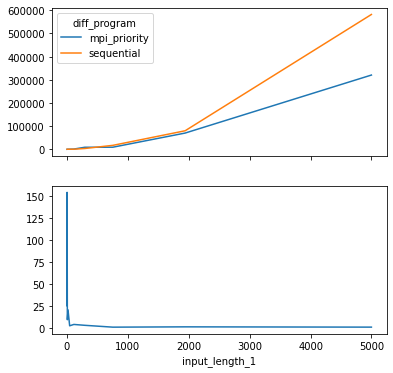

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.mpi_priority / temp.sequential).plot(ax=ax[1]);

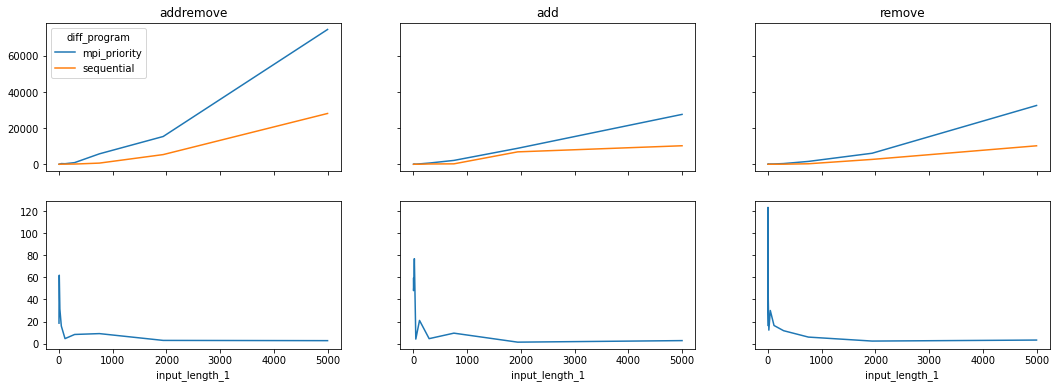

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 0.2) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp.mpi_priority / temp.sequential).plot(ax=ax[1][input_strategy_i]);

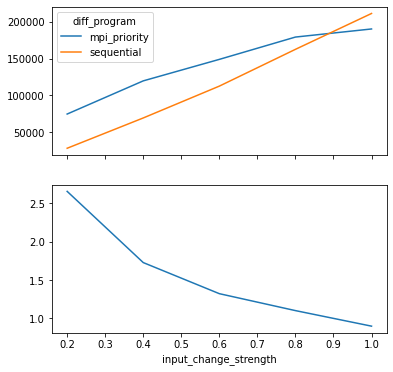

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.mpi_priority / temp.sequential).plot(ax=ax[1]);

0.128125
0.146875
0.11875


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
0,remove,113,1.0,0.0,zipf,8.0,46,0,431,0
1,add,292,0.6,0.0,zipf,8.0,177,0,1815,0
2,remove,292,0.6,0.0,zipf,8.0,102,0,863,0
3,remove,753,0.8,0.0,zipf,8.0,120,0,2725,0
4,independent,753,1.0,0.0,zipf,8.0,189,0,8826,0
5,independent,753,1.0,0.0,zipf,8.0,189,0,8826,0
6,remove,753,1.0,0.0,zipf,8.0,100,0,3315,0
7,remove,753,1.0,0.0,zipf,8.0,100,0,3315,0
8,addremove,753,1.0,0.0,zipf,8.0,161,0,17815,0
9,addremove,1940,0.4,0.0,zipf,8.0,239,0,23773,0


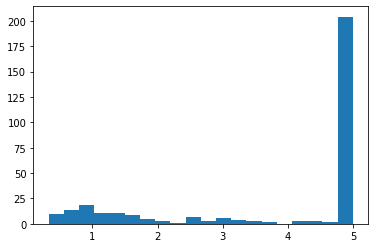

In [9]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp.mpi_priority < temp.sequential).mean())
print((temp.mpi_priority < 1.1 * temp.sequential).mean())
print((1.1 * temp.mpi_priority < temp.sequential).mean())

hist_values = temp.mpi_priority / temp.sequential
hist_values = hist_values.clip(upper=5)
plt.hist(hist_values, bins=20);

beaten_rows = []
for generation_config_i in temp[temp.mpi_priority < temp.sequential].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)